ФИО: Ковалишин Никита Игоревич

Группа ML-22

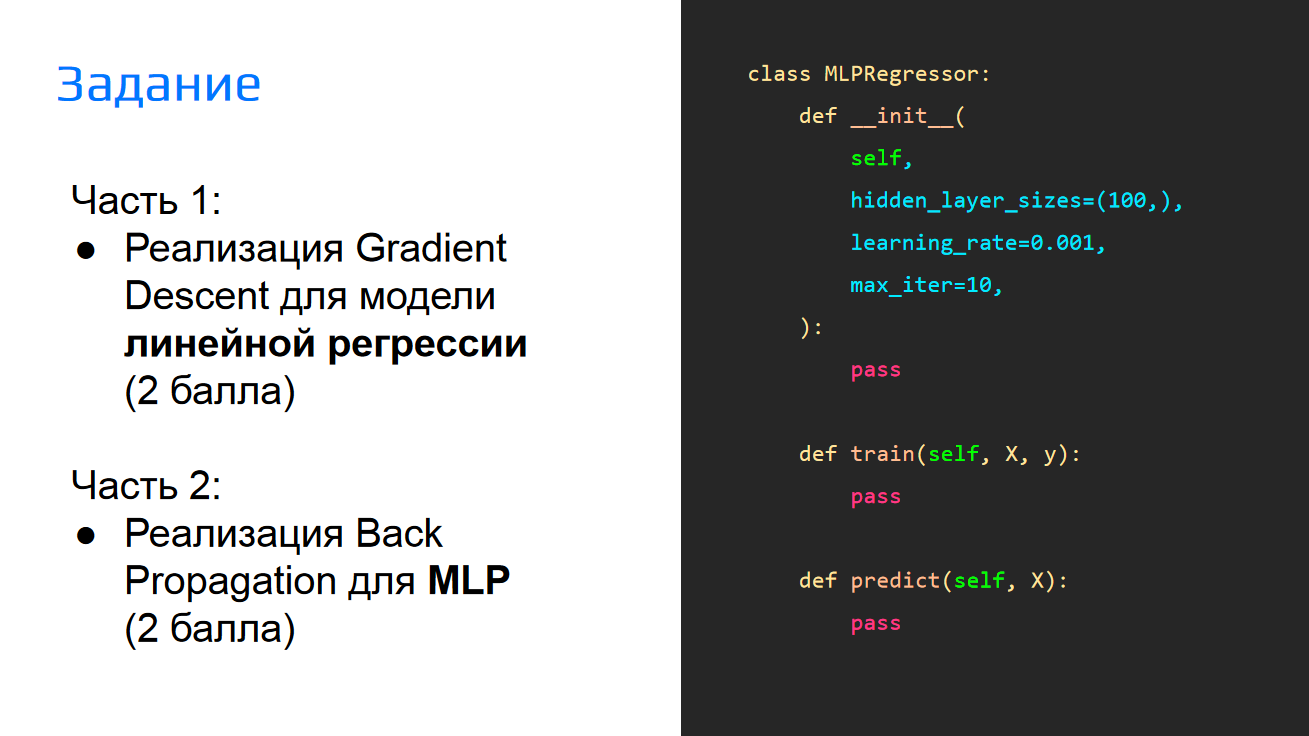

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [ ]:
def MSELoss(yPred, yTest):
  return np.sum((yPred.reshape(yPred.shape[0]) - yTest.reshape(yPred.shape[0]))**2) / yTest.size

# Загружаем выборку Diamonds

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [ ]:
diamonds_df = pd.read_csv('diamonds.csv')

In [ ]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


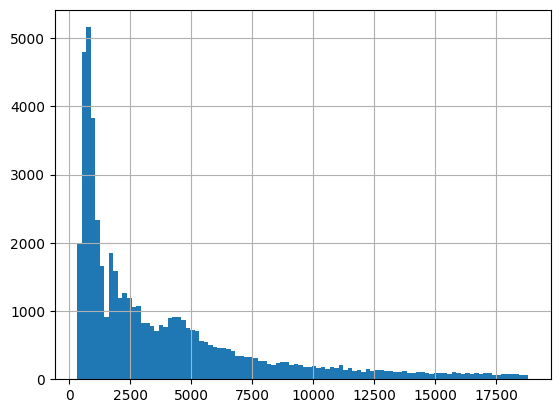

In [ ]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [ ]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [ ]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [ ]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [ ]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

# Обучаем стандартную модель линейной регрессии

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
print("Standard Linear regression weights:")
for i in range(len(reg.coef_[0])):
  print(f"wLStd[{i}] = {reg.coef_[0][i]}")
print("Standard Linear regression offset: bLStd =", reg.intercept_[0])


Standard Linear regression weights:
wLStd[0] = 51148.25187875298
wLStd[1] = 472.47472887197364
wLStd[2] = -1974.6921626136
wLStd[3] = 3530.7720608029204
wLStd[4] = -2988.6960306854317
wLStd[5] = -1478.3904747383942
wLStd[6] = -8721.956698475246
wLStd[7] = 1098.0443115006092
wLStd[8] = -324.0014469757882
Standard Linear regression offset: bLStd = 3097.999196196317


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
score = MSELoss(y_pred, y_test)
print("Standard Linear Regression MSELoss:", score)

Standard Linear Regression MSELoss: 1477039.708379342


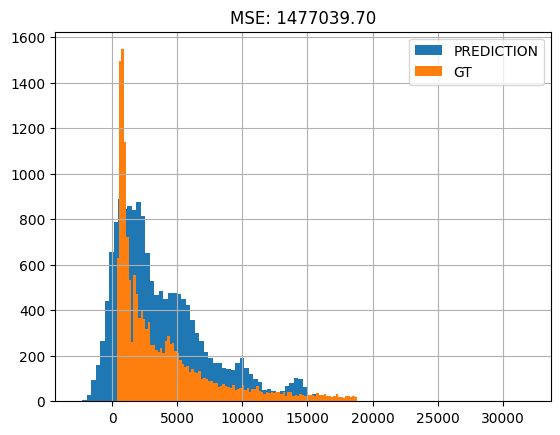

In [ ]:
plt.title(f'MSE: {str(score)[:10]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

### Linear Regression with Gradient Descent using:

In [ ]:
class GDLinearRegressor:
  def __init__(self, num_features, learning_rate=0.2, max_iter=20000,):
    self.learning_rate = learning_rate
    self.max_iter = max_iter#hi

    self.bLin = 0
    self.wLin = 0.5 - np.random.random(num_features)


  def train(self, X, y, debugLst = []):
    y_ = y.reshape(y.shape[0])
    for i in range(self.max_iter):
      yPred = np.dot(X, self.wLin) + self.bLin
      debugLst += [MSELoss(yPred, y_) / 1e6]
      self.bLin = self.bLin - self.learning_rate * np.sum(yPred - y_) / y_.size
      self.wLin = self.wLin - self.learning_rate * np.dot(yPred - y_, X) / y_.size


  def predict(self, X):
    return np.dot(X, self.wLin) + self.bLin

GDLinearRegressor weights:
wGDLR[0] = 49867.69857336929
wGDLR[1] = 486.3478506569155
wGDLR[2] = -1967.9241042524525
wGDLR[3] = 3548.8335949896837
wGDLR[4] = -2574.5588394930624
wGDLR[5] = -1346.9360337099922
wGDLR[6] = -6961.049025986661
wGDLR[7] = -479.29365496650405
wGDLR[8] = -1580.9186757572484
GDLinearRegressor offset: 
bGDLR = 2337.6830668047337


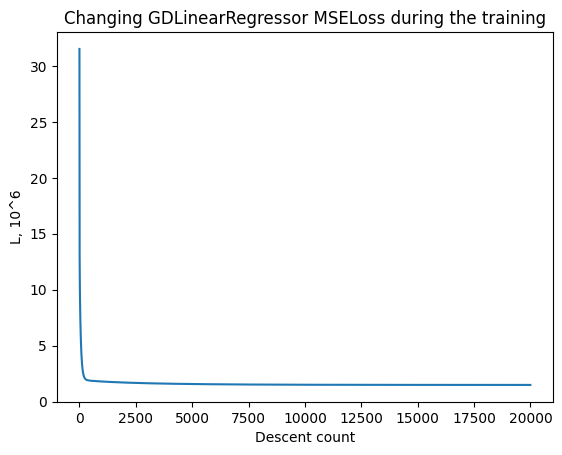

In [ ]:
debugGDLRLst = []
GDLR = GDLinearRegressor(X_train.shape[1], 0.7)
GDLR.train(X_train, y_train, debugGDLRLst)
print("GDLinearRegressor weights:")
for i in range(GDLR.wLin.size):
  print(f"wGDLR[{i}] = {GDLR.wLin[i]}")
print(f"GDLinearRegressor offset: \nbGDLR = {GDLR.bLin}")
plt.title('Changing GDLinearRegressor MSELoss during the training')
plt.xlabel('Descent count')
plt.ylabel('L, 10^6')
plt.plot(debugGDLRLst)
plt.show()

In [ ]:
yPredGDLR = GDLR.predict(X_test)
print("MSELoss test: ", MSELoss(yPredGDLR, y_test))

MSELoss test:  1479963.2472370912


Промежуточный Review. У модели GDLinearRegressor показатель MSELoss практически такой же, как и у Standard Linear Regression. То есть можно говорить о том, что Gradient Descent успешно подгоняет параметры модели линейной регрессии к библиотечным результатам.

# Создаём модель MLP для задачи регрессии

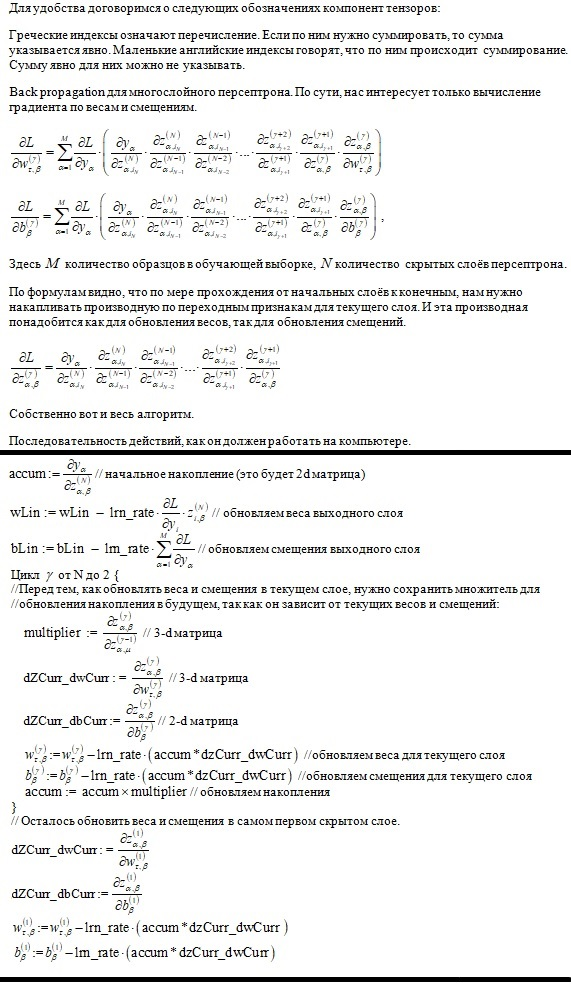

In [ ]:
class MLPRegressor:
  def __init__(self, num_features, Activation, DActivation, hidden_layer_sizes=(10,), learning_rate=0.01, max_iter=10,):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.Activation = Activation
    self.DActivation = DActivation

    self.bLin = 0
    self.BList = [np.zeros(size) for size in hidden_layer_sizes]
    self.wLin = 0.5 - np.random.random(hidden_layer_sizes[-1])

    self.WList = [0.5 - np.random.random((num_features, hidden_layer_sizes[0]))] + \
     [0.5 - np.random.random((hidden_layer_sizes[i], hidden_layer_sizes[i + 1])) \
      for i in range(len(hidden_layer_sizes) - 1)]


  def train(self, X, y, debugLst = []):
    y_ = y.reshape(y.shape[0])
    X = np.float128(X)
    hiddenLayersCount = len(self.BList)
    for k in range(self.max_iter):
      #List of transition features in hidden layers:
      TFList = [self.Activation(np.dot(X, self.WList[0]) + self.BList[0])]
      for i in range(hiddenLayersCount - 1):
        TFList += [self.Activation(np.dot(TFList[i], self.WList[i + 1]) + self.BList[i + 1])]
      yPred = np.float128(np.dot(TFList[-1], self.wLin) + self.bLin)
      debugLst += [MSELoss(yPred, y_) / 1e6]
      #Back propagation for MSE Loss (L = (1/(2*y_.size))*||yPred - y_||^2):
      #Initial the derivative of the external function by transition feature
      dyPred_dTFCurr = np.ones((X.shape[0], self.wLin.size)) * self.wLin
      #/\ /\ /\                                              /\ /\ /\
      #|| || || In the next iterations it will be accumulate || || ||
      #update of linear regression parameters (in last output layer):
      self.bLin = self.bLin - self.learning_rate * np.sum(yPred - y_) / y_.size
      self.wLin = self.wLin - self.learning_rate * np.dot(yPred - y_, TFList[-1]) / y_.size
      #The next step is parameters changing loop in backward pass:
      for i in range(-1, -hiddenLayersCount, -1):
        #argument 2d-matrix for current layer transitive features
        argCurr = np.dot(TFList[i - 1], self.WList[i]) + self.BList[i]
        #putting of the 2d-matrix argument in the derivative of sigmoid
        dAct_dArg = self.DActivation(argCurr)
        #TFCurr - transitive (hidden) features 2d-matrix for current hidden layer
        #TFPrev - ---------------//----------------- for previous (in forward pass) hidden layer
        #remember the 3-d matrix multiplier for the future update of dyPred_dTFCurr using old values of parameters:
        dTFCurr_dTFPrev = np.matmul(dAct_dArg.transpose(1, 0).reshape(dAct_dArg.shape[1], dAct_dArg.shape[0], 1), \
        self.WList[i].transpose(1, 0).reshape(self.WList[i].shape[1], 1, self.WList[i].shape[0]))
        #update of hidden layers parameters
        #offsets for current layer:
        self.BList[i] = self.BList[i] - self.learning_rate * np.dot(yPred - y_, dyPred_dTFCurr * dAct_dArg) / y_.size
        #weights for current layer:
        dTFCurr_dWCurr = np.matmul(dAct_dArg.reshape(dAct_dArg.shape[0], dAct_dArg.shape[1], 1), \
        TFList[i - 1].reshape(TFList[i - 1].shape[0], 1, TFList[i - 1].shape[1]))
        self.WList[i] = self.WList[i] - self.learning_rate * \
        np.dot(yPred - y_, dyPred_dTFCurr * dTFCurr_dWCurr.transpose(2, 0, 1)) / y_.size
        #accumulating of derivative of the external function:
        dyPred_dTFCurr3D = \
        np.matmul(dyPred_dTFCurr.reshape(dyPred_dTFCurr.shape[0], 1, dyPred_dTFCurr.shape[1]),
                  dTFCurr_dTFPrev.transpose(1, 0, 2))
        dyPred_dTFCurr = dyPred_dTFCurr3D.reshape(dyPred_dTFCurr.shape[0], dTFCurr_dTFPrev.shape[2])
      #last iteration to update the first hidden layer parameters:
      argFirst = np.dot(X, self.WList[0]) + self.BList[0]
      dAct_dArgFirst = self.DActivation(argFirst)
      self.BList[0] = self.BList[0] - self.learning_rate * np.dot(yPred - y_, dyPred_dTFCurr * dAct_dArgFirst) / y_.size
      dTFFirst_dWFirst = np.matmul(dAct_dArgFirst.reshape(dAct_dArgFirst.shape[0], dAct_dArgFirst.shape[1], 1),
                                  X.reshape(X.shape[0], 1, X.shape[1]))
      self.WList[0] = self.WList[0] - self.learning_rate * np.dot(yPred - y_, dyPred_dTFCurr * dTFFirst_dWFirst.transpose(2, 0, 1)) / y_.size

  def predict(self, X):
    TFeatures = self.Activation(np.dot(X, self.WList[0]) + self.BList[0])
    hiddenLayersCount = len(self.BList)
    for i in range(1, hiddenLayersCount):
      TFeatures = self.Activation(np.dot(TFeatures, self.WList[i]) + self.BList[i])#12
    return np.dot(TFeatures, self.wLin) + self.bLin

In [ ]:
def Sigmoid(arg):
  arg = np.float128(arg)
  return 1 / (1 + np.exp(-arg))

def DSigmoid(arg):
  arg = np.float128(arg)
  return np.exp(-arg) / (1 + np.exp(-arg))**2

def Tanh(arg):
  arg = np.float128(arg)
  return np.tanh(arg)

def DTanh(arg):
  arg = np.float128(arg)
  return 1 - (np.tanh(arg))**2

def Relu(arg):
  arg[arg < 0] = 0
  return arg

def DRelu(arg):
  arg[arg >= 0] = 1
  arg[arg < 0] = 0
  return arg

В примерах ниже берётся персептрон с тремя скрытыми слоями. Первый скрытый слой сожержит 20 нейронов, во втором - 30, в третьем - 40. Такое соотношение взято не просто так. При продвижении к выходному слою количество транзитных признаков в скрытых слоях будет расти. Регрессия в выходном слое будет содержать 40 признаков, вместо 9, что, даёт больше информации.

Test of Sigmoid.

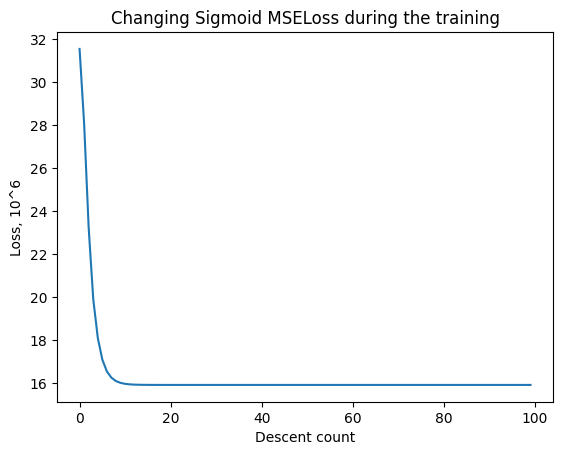

In [ ]:
debugLstSgmd = []
MLPSigmoid = MLPRegressor(9, Sigmoid, DSigmoid, (20, 30, 40), 0.01, 100)
MLPSigmoid.train(X_train, y_train, debugLstSgmd)
plt.title('Changing Sigmoid MSELoss during the training')
plt.ylabel('Loss, 10^6')
plt.xlabel('Descent count')
plt.plot(debugLstSgmd)
plt.show()

In [ ]:
yPredSgmd = MLPSigmoid.predict(X_test)
print("MSELoss test: ", MSELoss(yPredSgmd, y_test))

MSELoss test:  15897462.5806128478935


Помежуточный review по Sigmoid. Эта функция активации показала плохой результат по сравнению с классической линейной регрессией, что видно по MSELoss. Среднеквадратичная ошибка больше в 11 раз! Но на самом деле этого скорее стоило ожидать, ведь для задачи нейросетевой регрессии сигмоида очень плохо подходит из-за ограниченного своего спектра значений. На мой взгляд, должно быть очень много нейронов с сигмоидами, чтобы они могли охватывать весь спектр значений, которые могут быть представлены в выборке.

Попробуем убедиться в этом, воспользовавшись ещё одной функцией с ограниченным спектром значений.

Test of Tanh.

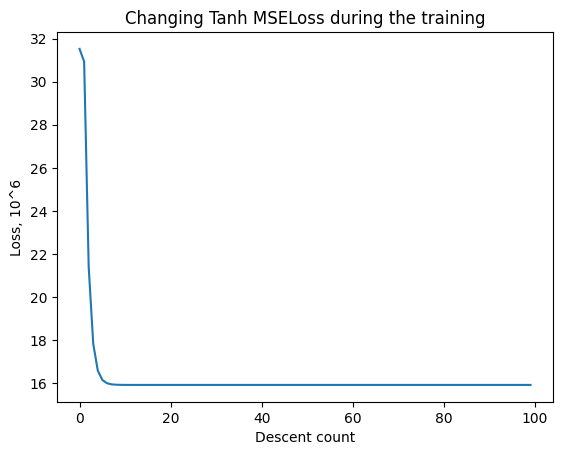

In [ ]:
debugLstTanh = []
MLPTanh = MLPRegressor(9, Tanh, DTanh, (20, 30, 40), 0.01, 100)
MLPTanh.train(X_train, y_train, debugLstTanh)
plt.title('Changing Tanh MSELoss during the training')
plt.ylabel('Loss, 10^6')
plt.xlabel('Descent count')
plt.plot(debugLstTanh)
plt.show()

In [ ]:
yPredTanh = MLPTanh.predict(X_test)
print("MSELoss test: ", MSELoss(yPredTanh, y_test))

MSELoss test:  15897462.590629057906


Помежуточный review по Sigmoid. Как и ожидалось, ситуация не поменялась. С гиперболическим тангенсом такая же проблема, что и с сигмоидой.

А теперь попробуем  воспользоваться функцией активации, которая специально предназначена для задачи нейросетевой регрессии.

Test of Relu

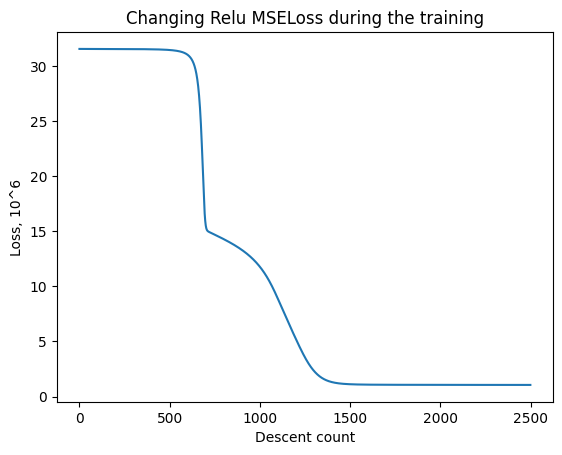

In [ ]:
debugLstRelu = []
MLPRelu = MLPRegressor(9, Relu, DRelu, (20, 30, 40), 1e-7, 2500)
MLPRelu.train(X_train, y_train, debugLstRelu)
plt.title('Changing Relu MSELoss during the training')
plt.ylabel('Loss, 10^6')
plt.xlabel('Descent count')
plt.plot(debugLstRelu)
plt.show()

In [ ]:
yPredRelu = MLPRelu.predict(X_test)
print("MSELoss test: ", MSELoss(yPredRelu, y_test))

MSELoss test:  1045115.9030985718022


Видно, что с Relu-активацией ситуация в корне поменялась. Теперь можно говорить о том, что данный персептрон обошёл по качеству линейную регрессию, показав гораздо меньший MSELoss. Здесь преимущества Relu раскрываются по полной. Но и недостатки так же присутствуют. Приходится тонко настраивать параметры, так как производная Relu-активации это пороговая функция. Из-за этого она очень чувствительна к learning_rate. Если learning_rate будет относительно большим, то градентный спуск будет очень нестабильным, и врят-ли можно будет вообще получить сходимость хоть к чему-то. В данной модели темп обучения уже подобран хорошо, поэтому на графике выше видно хорошую сходимость.

Сравним предсказание нейронной сети с target'ом с помощью гистограммы:

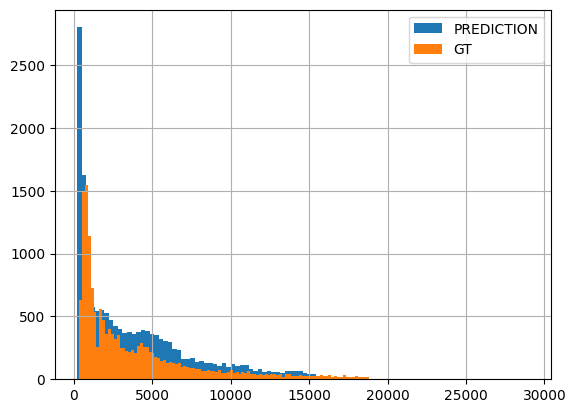

In [ ]:
plt.hist(yPredRelu.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

По гистограмме даже визуально видно, что предсказание нейронной сети с Relu и target'а намного ближе друг к другу, по сравнению с линейной регрессией. И самое главное, нет отрицательной стоимости бриллианта)

Таким образом, была реализована модель линейной регрессии через градиентный спуск. Так же была реализована модель многослойного персептрона векторизованными средствами библиотеки Numpy. Результаты сильно зависели от выбора функции активации. Наилучшим образом показала себя Relu-активация, что неудивительно, ведь она и предназначена в основном для регресионных нейросетей.